## Exploring tpf

In [1]:
import matplotlib.pyplot as pl
%matplotlib inline

import os
from glob import glob
import numpy as np
from astropy.io import fits
import pandas as pd

In [2]:
file_list = glob('../Yu2018candidates/reduced/*.fits')
file_list.sort()
len(file_list)

26

In [76]:
fname = file_list[3]

rec_array = fits.open(fname)
rec_array.info()

Filename: ../Yu2018candidates/reduced/211552050_round.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  TARGETTABLES    1 BinTableHDU    284   3888R x 12C   [D, E, J, 99J, 99E, 99E, 99E, 99E, 99E, J, E, E]   
  2  APERTURE      1 ImageHDU        61   (11, 9)   float64   
  3  ROUND_APER0    1 BinTableHDU     70   3864R x 3C   [D, D, D]   
  4  ROUND_APER2    1 BinTableHDU     70   3883R x 3C   [D, D, D]   
  5  ROUND_APER1    1 BinTableHDU     70   3857R x 3C   [D, D, D]   


(0.998, 1.001)

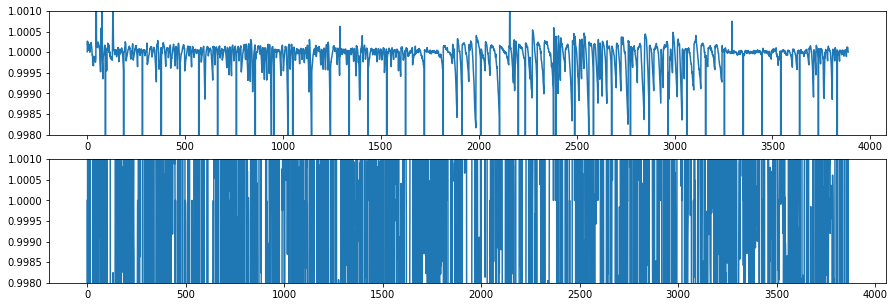

In [98]:
idx = 3
df = Table(fits.open(fname)[idx].data).to_pandas()

flux = cube[:,mask].sum(axis=1).astype(float)
flux /= np.median(flux)
filt = medfilt(flux, kernel_size=49)
flux /= filt

fig, ax = pl.subplots(2,1,figsize=(15,5))
ax[0].plot(flux)
ax[0].set_ylim(0.998,1.001)

ax[1].plot(df.flux)
ax[1].set_ylim(0.998,1.001)

In [64]:
cube = rec_array[1].data['RAW_CNTS']
cube[mask].sum(axis=1)

array([50064168, 50063467, 50070741, ..., 49368683, 49368250, 49365409])

In [4]:
index = 1
hdr  = rec_array[index].header
raw = rec_array[index].data

In [5]:
obj_name = hdr['OBJECT']

bjdref = hdr['BJDREFI']
start = bjdref+hdr['TSTART']
stop  = bjdref+hdr['TSTOP']
ndata = len(raw)

times = np.linspace(start,stop,ndata)

In [6]:
start, stop

(2458095.466691479, 2458175.0219468335)

In [7]:
index = 3 #3,4,5

shape = raw[0][index].shape
fluxes = np.zeros((len(raw),shape[0], shape[1]))

for i in range(len(raw)):
    fluxes[i,:,:] = raw[i][index]

In [8]:
fluxes.shape

(3888, 11, 11)

In [9]:
from astropy.table import Table

new = rec_array[index].data

df=Table(new).to_pandas()

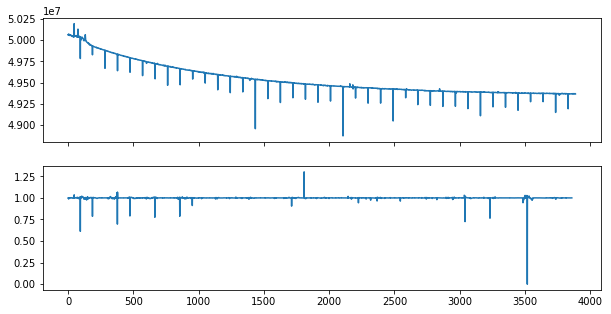

In [10]:
fig, ax = pl.subplots(2,1,figsize=(10,5),sharex=True)

flux = np.sum(fluxes, axis=(1,2))
ax[0].plot(flux)
ax[1].plot(df.flux)

In [11]:
fname = file_list[0]

def compare(fname):
    rec_array = fits.open(fname)
    
    index = 1
    hdr  = rec_array[index].header
    raw = rec_array[index].data
    
    index = 3 #3,4,5

    shape = raw[0][index].shape
    fluxes = np.zeros((len(raw),shape[0], shape[1]))

    for i in range(len(raw)):
        fluxes[i,:,:] = raw[i][index]
    
        
    from astropy.table import Table

    new = rec_array[index].data

    df=Table(new).to_pandas()
    
    fig, ax = pl.subplots(2,1,figsize=(10,5),sharex=True)

    flux = np.sum(fluxes, axis=(1,2))
    trend=medfilt(flux,kernel_size=49)
    ax[0].plot(flux/np.median(flux))
    ax[1].plot(trend)
    ax[2].plot(df.flux)
    

/home/muscat/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


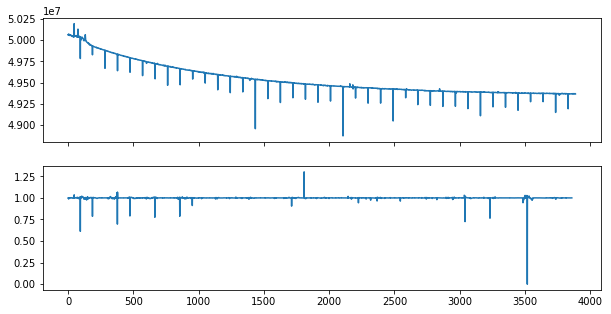

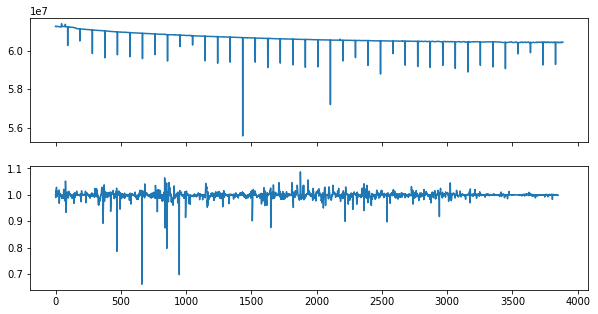

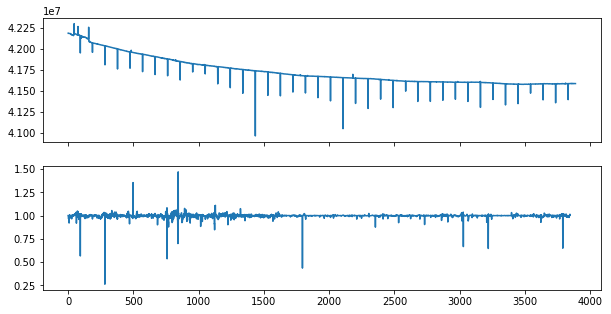

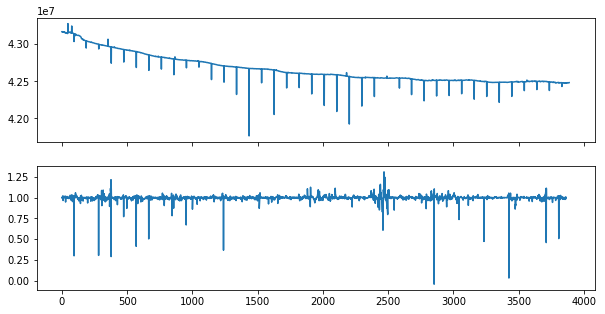

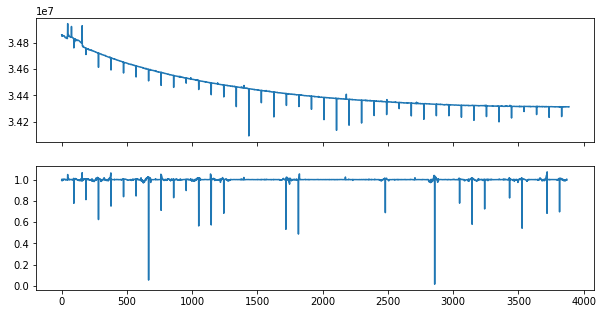

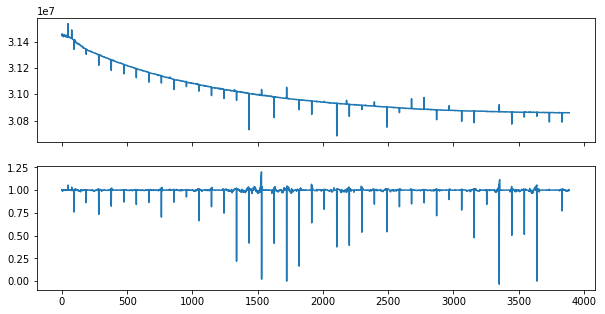

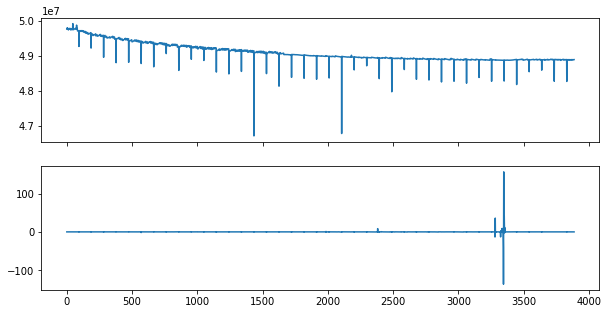

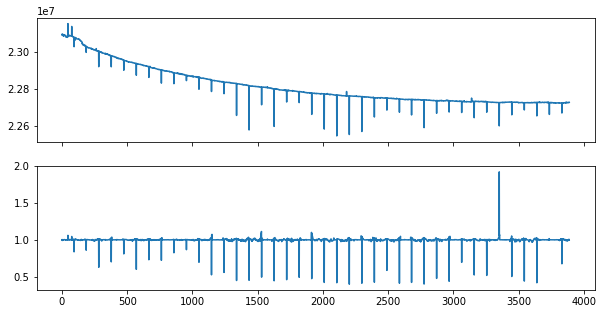

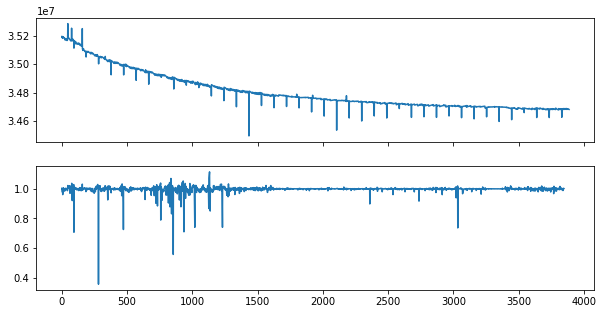

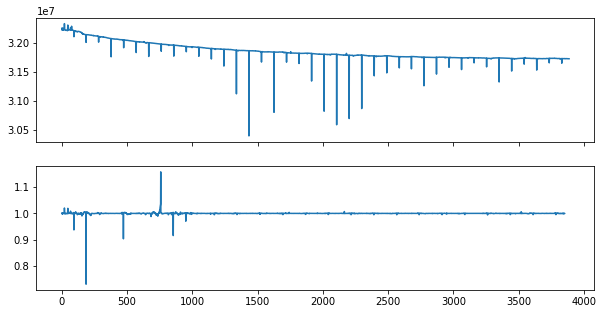

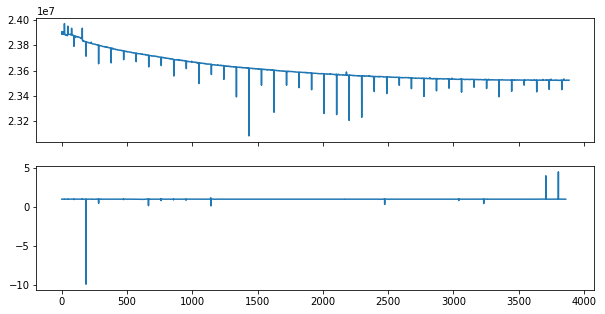

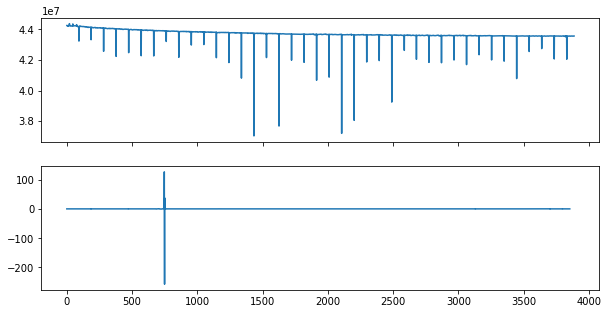

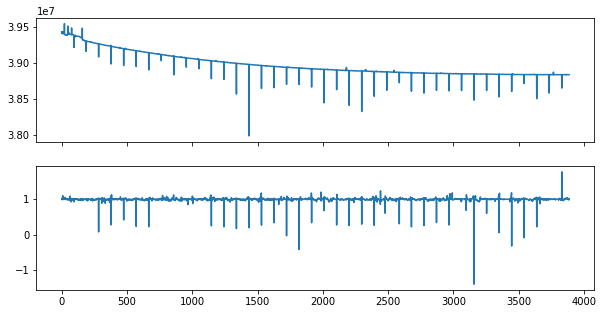

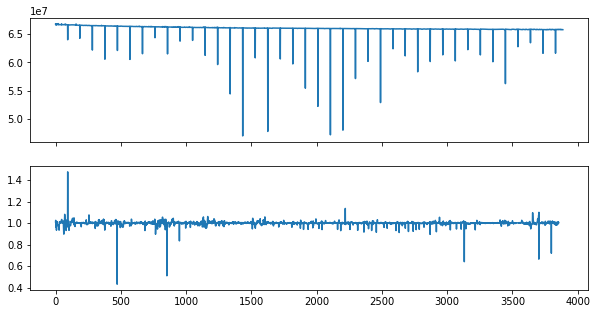

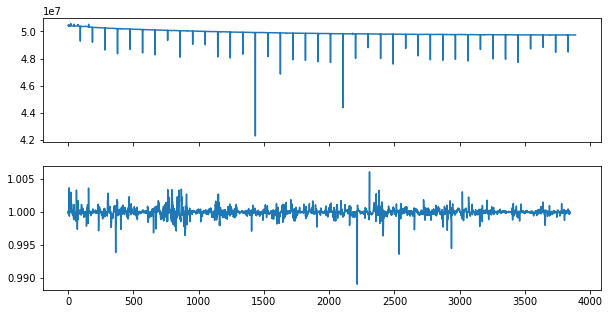

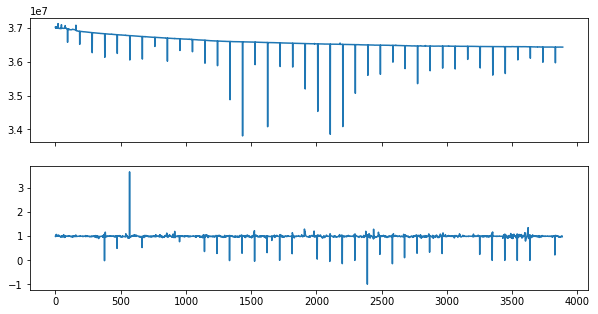

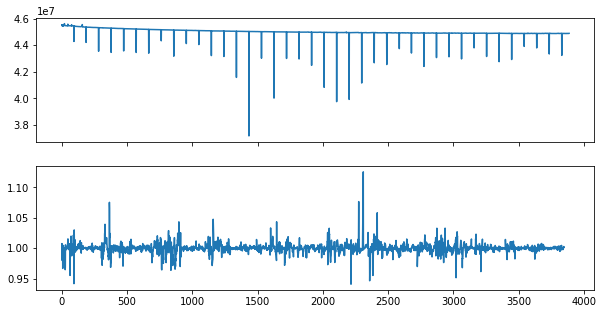

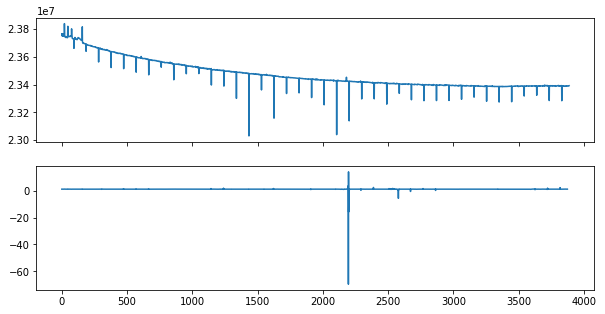

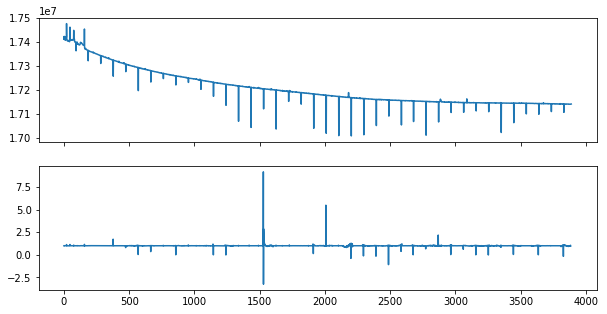

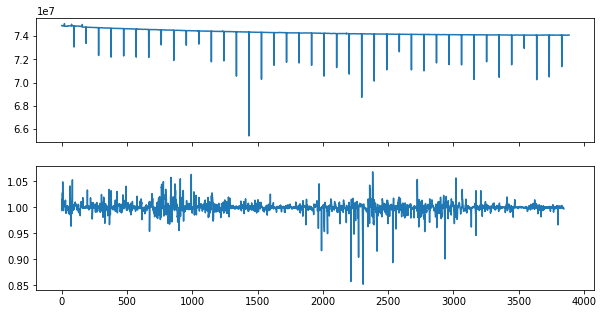

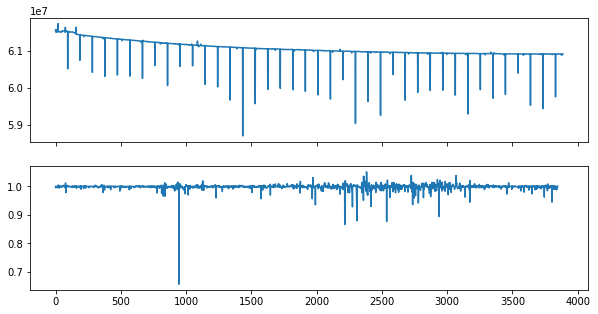

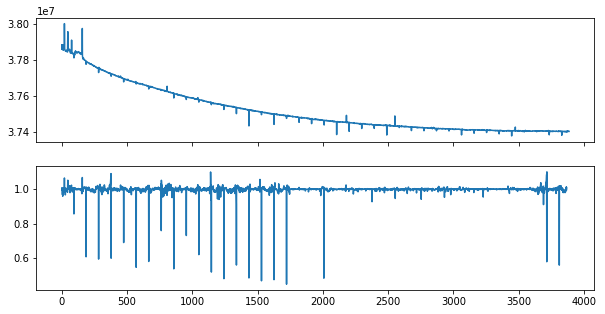

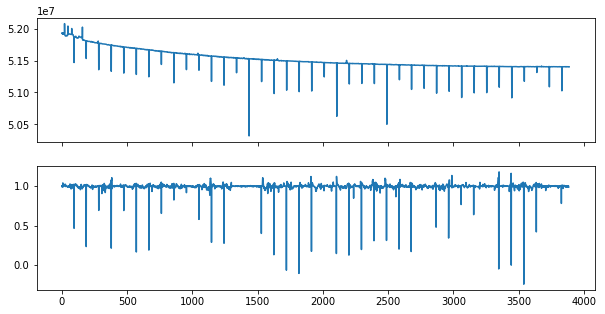

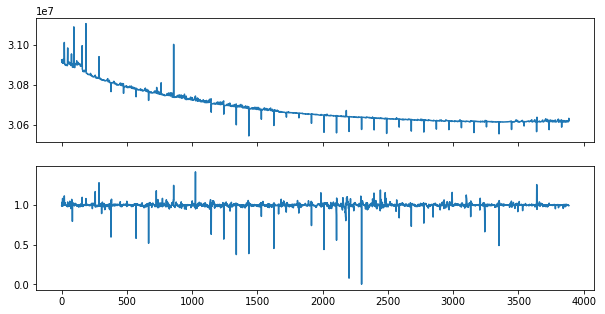

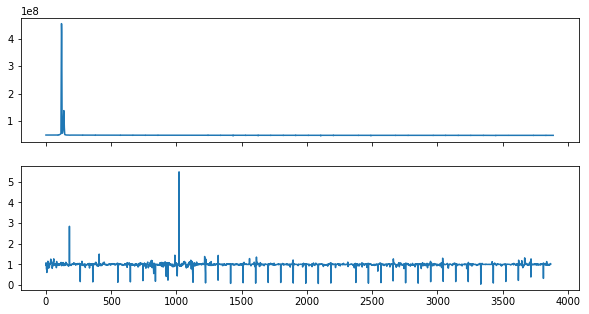

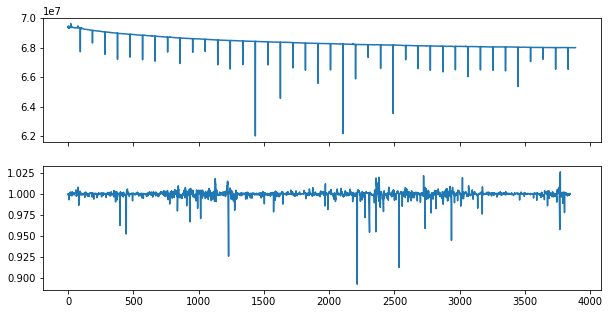

In [18]:
for fname in file_list:
    compare(fname)

In [53]:
from scipy.signal import medfilt

def tpf2lc(fname):
    rec_array = fits.open(fname)
    
    index = 1
    hdr  = rec_array[index].header
    raw = rec_array[index].data
    
    index = 3 #3,4,5
    shape = raw[0][index].shape
    fluxes = np.zeros((len(raw),shape[0], shape[1]))

    for i in range(len(raw)):
        fluxes[i,:,:] = raw[i][index]
    #sum
    flux = np.sum(fluxes, axis=(1,2))
    #median filter
    trend=medfilt(flux,kernel_size=49)
    return flux, trend

In [54]:
def plot(flux,trend):
    fig, ax = pl.subplots(2,1,sharex=True,figsize=(15,5))
    ax[0].plot(flux/np.median(flux),'b')
    ax[1].plot(flux/trend,'r')

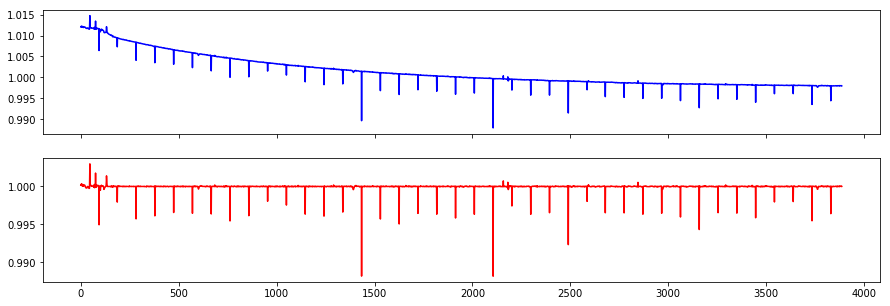

In [55]:
fname = file_list[0]
flux, trend = tpf2lc(fname)
plot(flux,trend)

/home/muscat/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


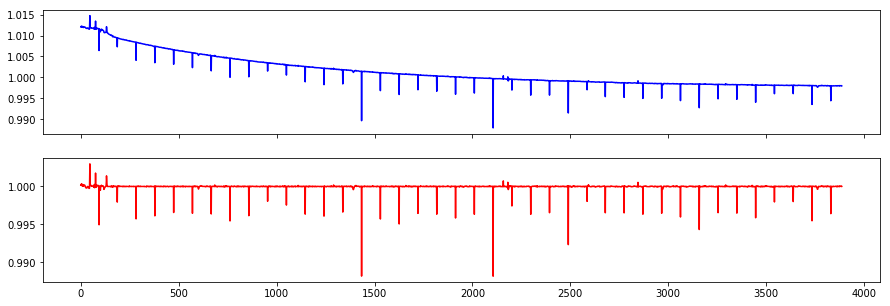

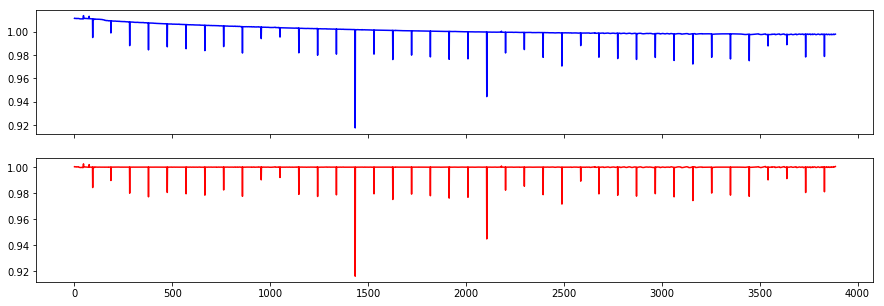

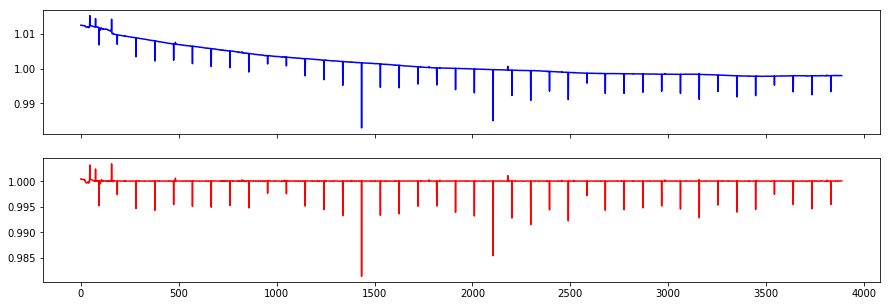

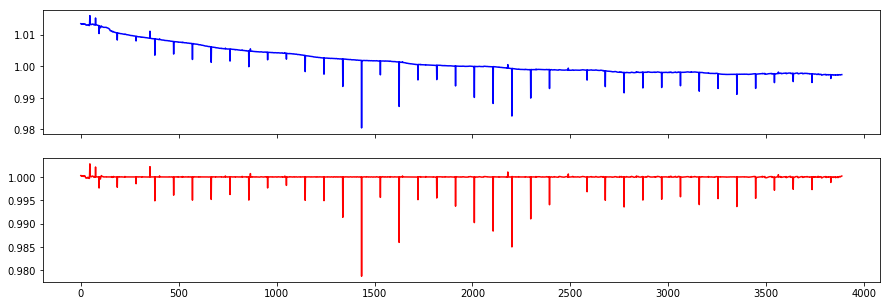

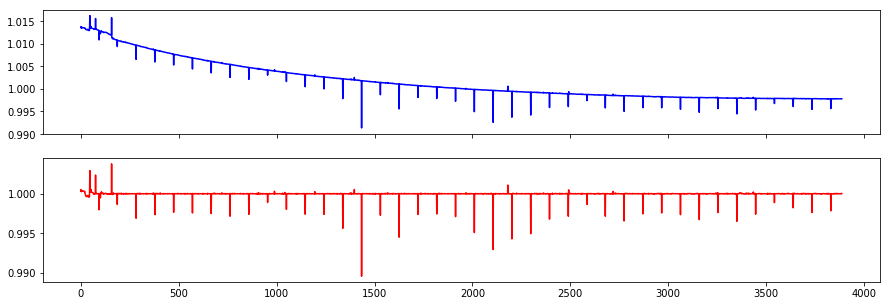

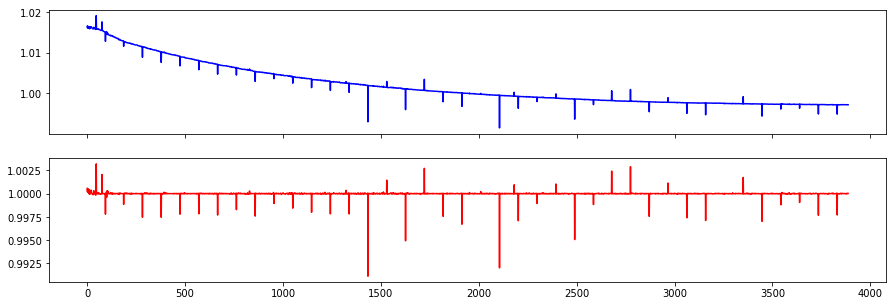

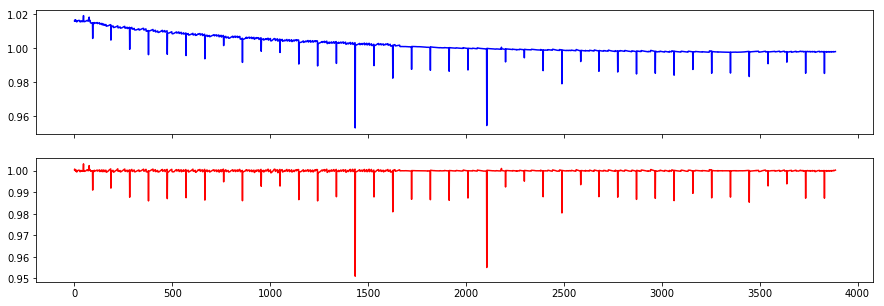

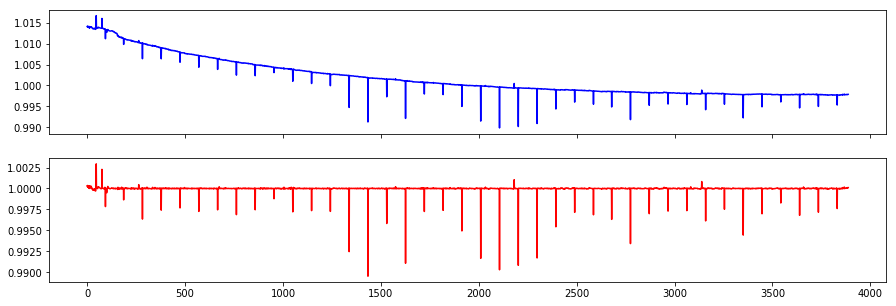

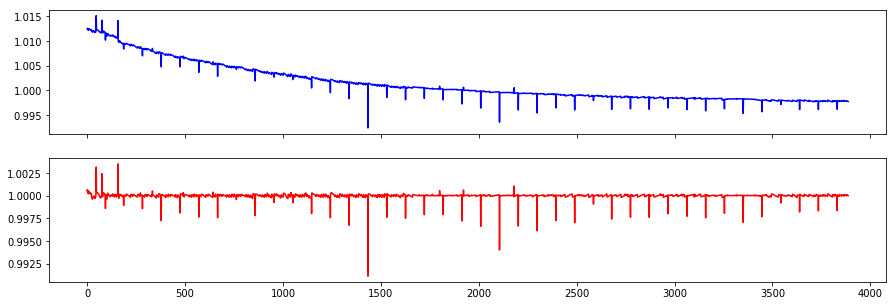

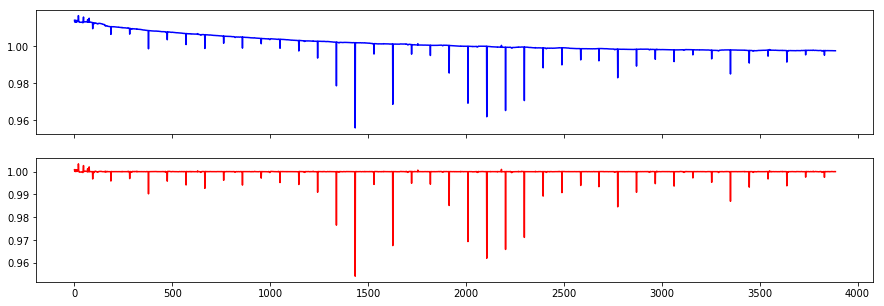

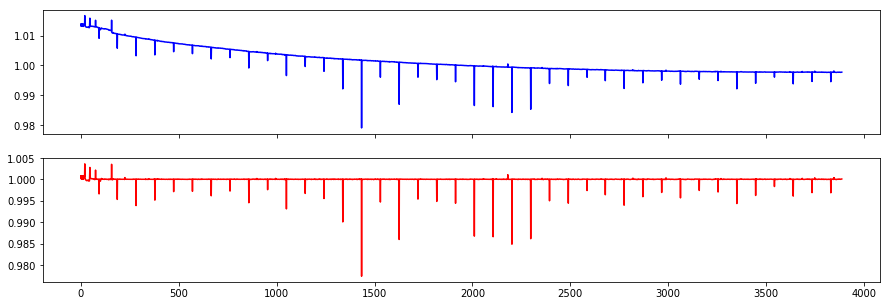

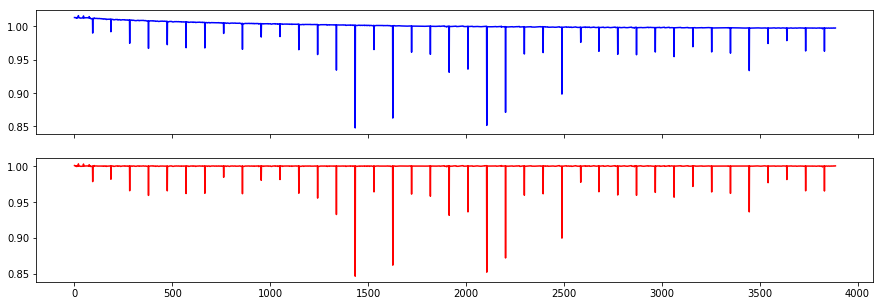

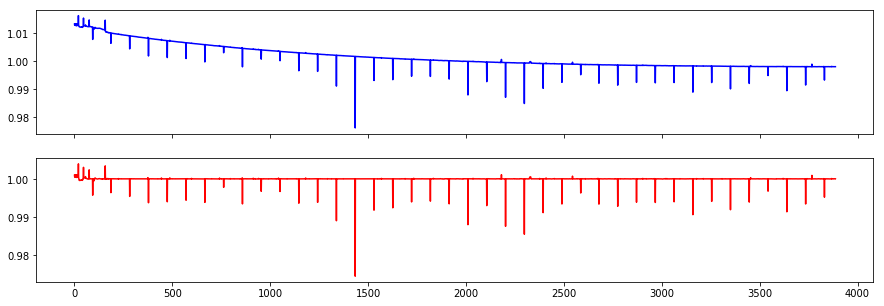

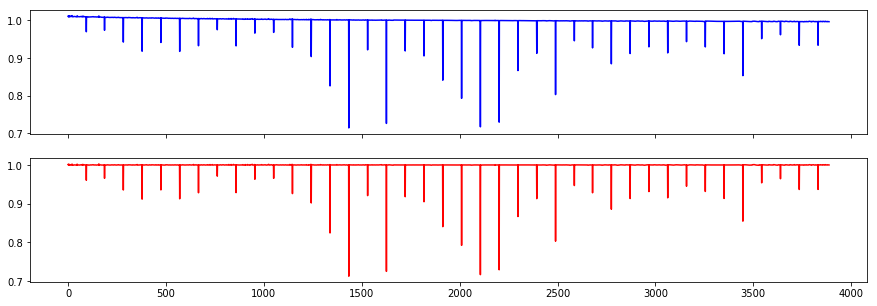

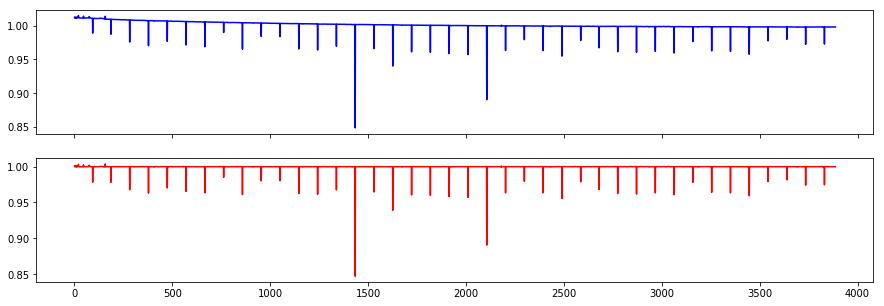

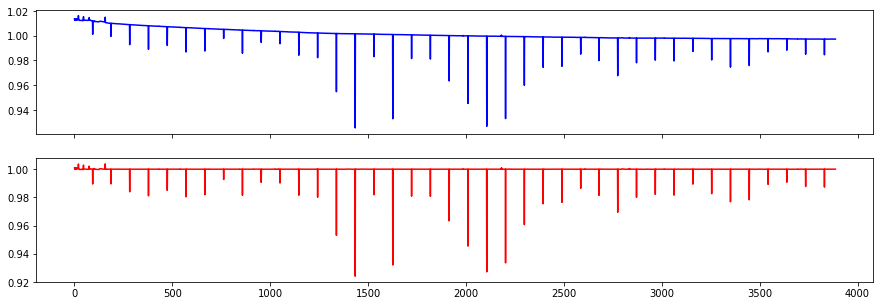

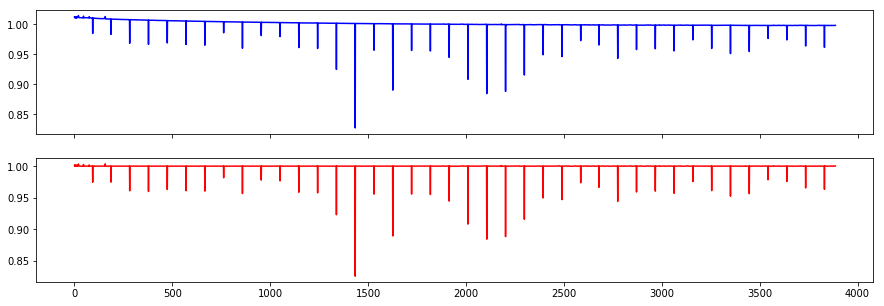

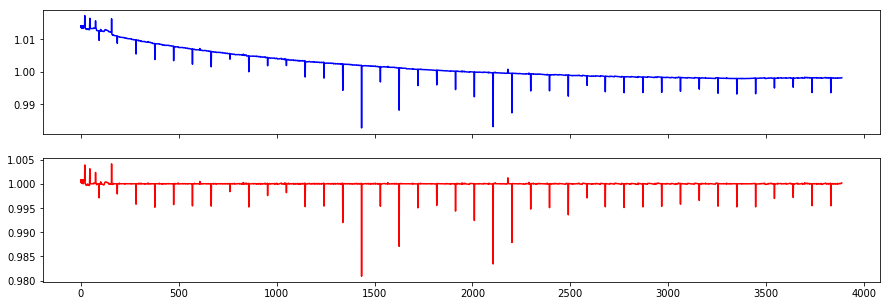

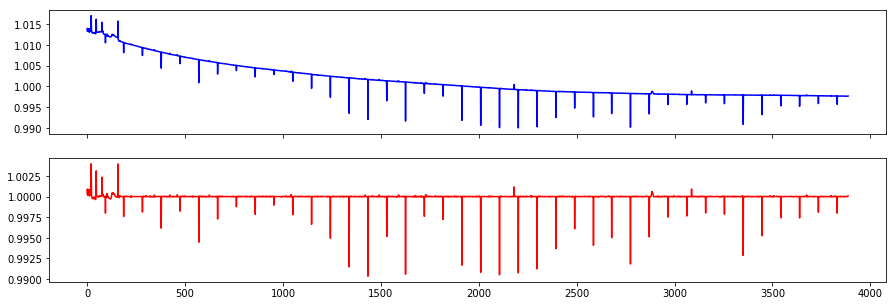

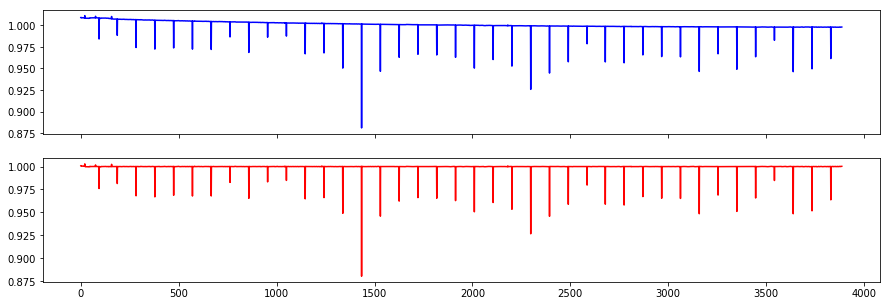

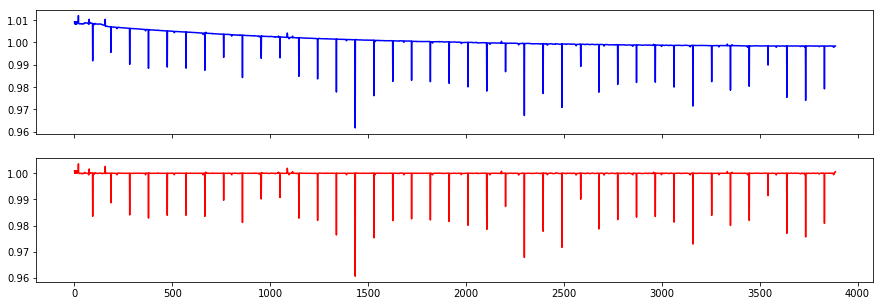

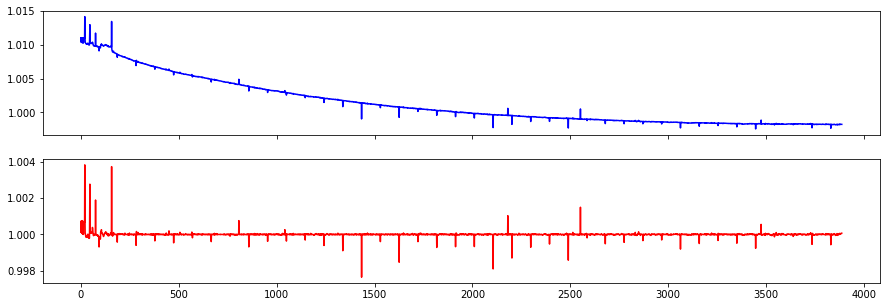

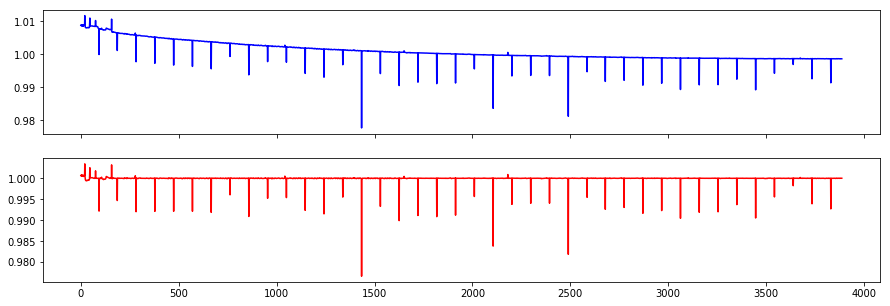

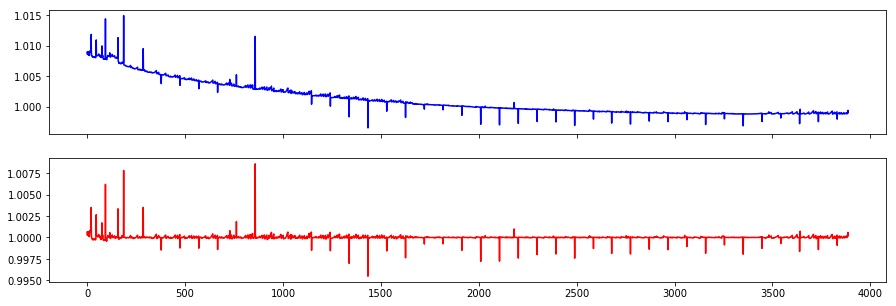

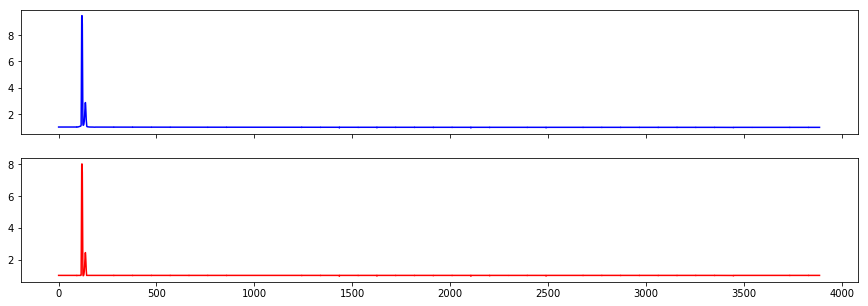

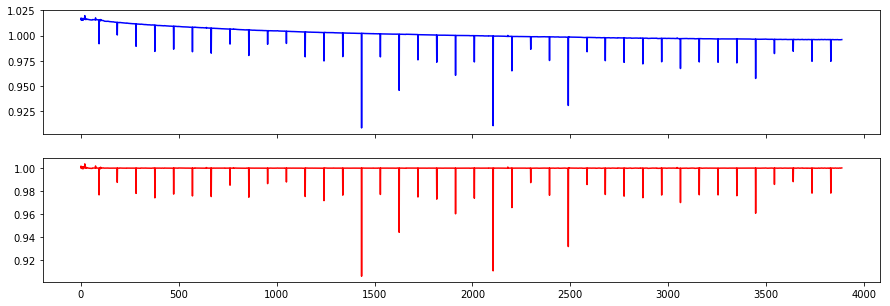

In [56]:
for fname in file_list:
    flux, trend = tpf2lc(fname)
    plot(flux,trend)

In [31]:
import sys

sys.path.append('/home/muscat/github/transit/lightkurve2/K2tools/')
from utils import *

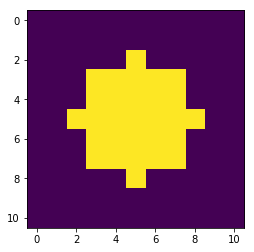

In [35]:
mask = make_mask(fluxes, rad=3, shape='round')
pl.imshow(mask)

In [99]:
from photutils import centroid_com

In [100]:
centroid_com()

In [10]:
import sys
sys.path.append('../K2tools')
from utils import *

In [11]:
fluxes.shape

(3888, 11, 11)

Comparing with lightkurve.KeplerTargetPixelFile

In [27]:
from lightkurve import KeplerTargetPixelFile

tpf = KeplerTargetPixelFile(fname, quality_bitmask='hardest')

In [28]:
tpf.flux.shape

(3888, 11, 11)

In [29]:
tpf.interact()

Loading BokehJS ...

Output()

In [16]:
aper_rad = 5
irregular_mask = make_mask(fluxes,cutoff_limit=1.0,shape='irregular')
round_mask  = make_mask(fluxes,rad=aper_rad,shape='round')
square_mask = make_mask(fluxes,rad=aper_rad,shape='square')

In [17]:
lc = tpf.to_lightcurve(aperture_mask='all');

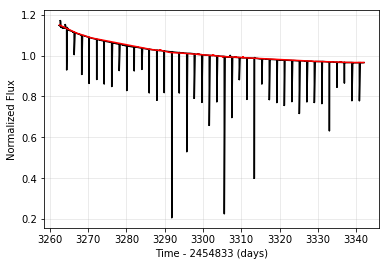

In [18]:
flat_lc, trend = lc.flatten(window_length=301, return_trend=True)

ax = lc.plot()                         
trend.plot(ax, color='red');

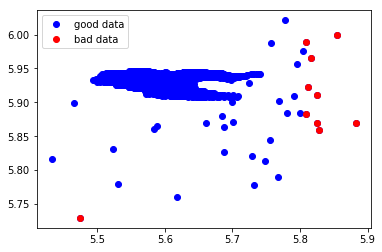

In [19]:
centroids, centroid_mask = get_centroids(fluxes, centroid_shift=0.2,
                                         check_outliers=True, showfig=True)

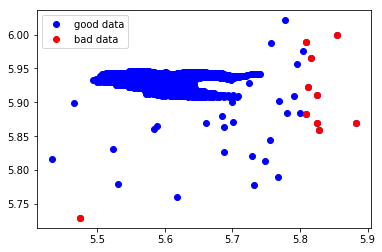

In [18]:
method = 'abs_distance'

times, fluxes = tpf2pix(fname,index=3,verbose=False)
centroids, centroid_mask = get_centroids(fluxes,  centroid_shift=0.2, method=method,
                                         check_outliers=True, showfig=True)

In [19]:
df = pix2lc(times,fluxes,aper_rad=5,aper_shape='round',
           cutoff_limit=1.0,centroid_shift=0.2,method=method)

In [20]:
df = pix2lc(times,fluxes,aper_rad=5,aper_shape='round',
           cutoff_limit=1.0,centroid_shift=0.2,method=method)

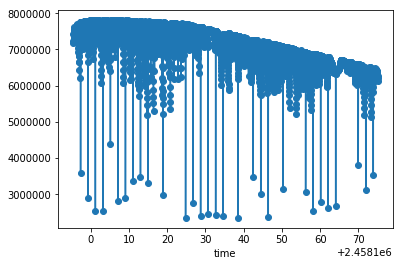

In [21]:
df.set_index('time')['flux'].plot(marker='o')

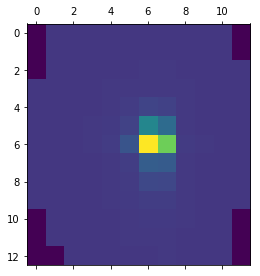

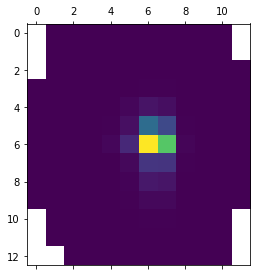

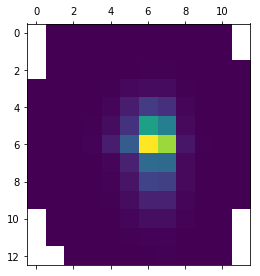

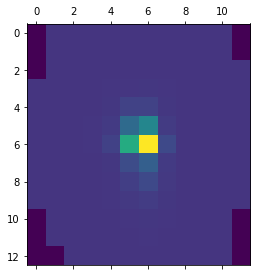

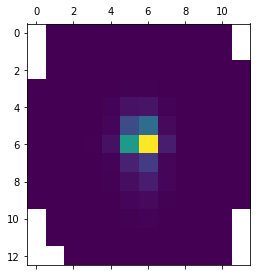

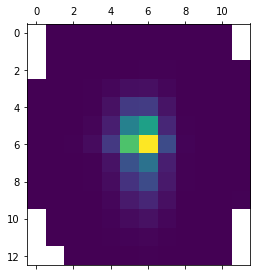

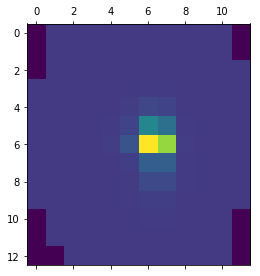

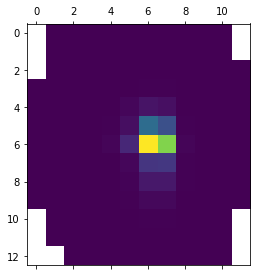

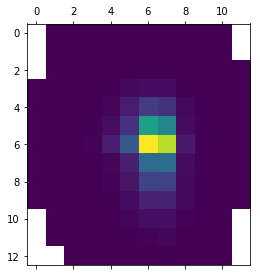

In [72]:
for i in np.arange(3,6,1):
    for j in np.arange(3,6,1):
        try:
            pl.matshow(data[i][j])
        except:
            print('skipping index={}'.format(i))